In [126]:

### Person class (parent class of buyer and renter classes) which stores a person's assets and liabilities.
class Person:
    
    def __init__(self, assets, liabilities):
        self.assets = assets
        self.liabilities = liabilities
        
    def change_assets(self, delta):
        self.assets+=delta
        
    def change_liabilities(self, delta):
        self.liabilities+=delta

class Renter(Person):
    pass


class Buyer(Person):
    
    def buy_home(self, home):
        
        #The amoutn that is paid upon purhcase of home (should decrease assets)
        immediate_payment = home.down_payment+home.provincial_tax+home.municipal_tax+home.municipal_rebate+\
        home.insurance_pst+home.legal_fees+home.title_insurance+home.inspection_fee+home.appraisal_fee
        
        #increase in liability (i.e., total mortgage amount)
        increase_in_liability = home.price - home.down_payment + home.default_insrance
        
        #increase in assets (i.e., price of home on purchase data)
        increase_in_assets = home.price
        
        #apply the changes calculated above to the instance of buyer.
        self.change_assets(increase_in_assets - immediate_payment)
        self.change_liabilities(increase_in_liability)
    
    def annual_payment(self, home):
        
        #return total annual mortgage payment including interest and principal amounts
        #include $1k for property tax and insurance and maintenance
        borrowed = home.price - home.down_payment + home.default_insrance
        maintenance = home.price*.01
        interest = 0.03/12
        periods = 12*25
        payment = borrowed*(interest*(1+interest)**periods)/((1+interest)**periods - 1)
        return(payment*12 + maintenance)
        
        

### Home class which holds all paramenters for the initial purchase of the home for a buyer.
class Home():
    
    def __init__(self, price=500000, dp=25000, def_ins=14175, pltt=6475, mltt=6475, mreb=-3725, ins_pst=1134,
                legal=1000, title_ins=500, inspection=500, appraisal=300):
        self.price = price
        self.down_payment = dp
        self.default_insrance = def_ins
        self.provincial_tax = pltt
        self.municipal_tax = mltt
        self.municipal_rebate = mreb
        self.insurance_pst = ins_pst
        self.legal_fees = legal
        self.title_insurance = title_ins
        self.inspection_fee = inspection
        self.appraisal_fee = appraisal
        

In [2]:
import pandas as pd

In [3]:
### Setting up a 'rents' df which shows the mean price of rental appartments in Toronto
#various different types of homes.

rents = pd.read_csv('/Users/joel/Documents/GithubProjects/BuyOrRent/rent.csv', header=2)
rents['Year'] = [i for i in range(1990,2018)]
rent_columns = ['Year','Bachelor', '1 Bedroom', '2 Bedroom', '3 Bedroom +']
rents = rents.loc[:,rent_columns]


In [4]:
### Setting up a 'house_prices' df which shows the mean purchase price of homes in
# select Canadian cities.

house_prices = pd.read_csv('/Users/joel/Documents/GithubProjects/BuyOrRent/TorontoHousePriceIndex.csv')
house_prices.index = house_prices['Transaction Date']
cols_ = ['ns_halifax', 'on_toronto']
house_prices.index = house_prices['Transaction Date']
rows_ = [i for i in house_prices.index if 'Dec' in i]
house_prices = house_prices.loc[rows_,cols_]

In [223]:
### Setting up an 'equity' df which shows the closing price of the XIU index on each
# of the last days in the years 1999-2017 and partially the last day in 2018.
equity = pd.read_csv('/Users/joel/Documents/GithubProjects/BuyOrRent/XIU.TO.csv')
stamps = [pd.to_datetime(i) for i in equity['Date']]
equity['Date'] = stamps
equity['year'] = [i.year for i in equity['Date']]
equity['month'] = [i.month for i in equity['Date']]
equity['day'] = [i.day for i in equity['Date']]
equity_grouped = equity.groupby(['year'])

lasts = []
for i,j in equity_grouped:
    lasts.append(j.index[-1])
    
equity = pd.DataFrame(equity.loc[lasts,['Date','Close']])
equity=equity.reset_index(drop=True)

In [127]:
# Create a 1 instance each of a Buyer and Seller. Pass house to buyer and then compare net assets at year 0. 

asset_starting, liabilities_starting = 50000,0

ronnie = Renter(asset_starting, liabilities_starting)
bonnie = Buyer(asset_starting, liabilities_starting)

crib = Home()

bonnie.buy_home(crib)

In [299]:
#Set up annual Cashflows

# buyer has mortgage payment, property tax and insurance, and maintenance
bonnie_flow = bonnie.annual_payment(crib)

#seller will spend the same as buyer (to make a comprable scenario) and use any excess over rent
# and renter's insurance to buy equity

ronnie_flow = bonnie_flow
ronnie_rent = 2000
ronnie_insurance = 25
ronnie_equity = ronnie_flow - ronnie_rent*12 - ronnie_insurance*12
(bonnie_flow-5000)/12

2319.7231945633052

In [193]:
increases = []

toronto_prices = house_prices['on_toronto'][8:]
for i in range(len(toronto_prices)-1):
    increases.append((toronto_prices[i+1]-toronto_prices[i])/toronto_prices[i])

In [300]:
house_increase = sum(increases)/len(increases)-.02

In [318]:
equity_increase = []
equity_close = equity['Close']

for i in range(len(equity_close)-1):
    equity_increase.append((equity_close[i+1] - equity_close[i])/equity_close[i])

In [319]:
equity_increase = sum(equity_increase)/len(equity_increase)-.02

In [324]:
house_price = 500000
for i in range(25):
    house_price = house_price*(1+house_increase)

house_price

1590911.726444616

In [333]:
equity_price = ronnie_equity+4000

for i in range(25):
    equity_price = equity_price*(1+equity_increase)+ronnie_equity+4000

equity_price

466681.26666554477

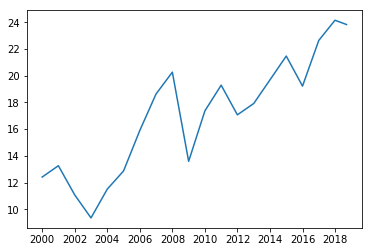

In [353]:
from matplotlib import pyplot as plt

equity
plt.plot(equity['Date'], equity['Close'])
